### Uppgift 0 - uppvärmning med riket
- 0.a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.

- Import and read the excel file.



In [2]:
import pandas as pd


file_path_riket = ("../Labb2/riket2023_åk9_np.xlsx")

# Read the different sheets from the Excel file, skipping the first 8 rows, and store it in a DataFrame.
df_riket_engelska = pd.read_excel(file_path_riket, sheet_name='Engelska', skiprows=8)
df_riket_matematik = pd.read_excel(file_path_riket, sheet_name='Matematik', skiprows=8)
df_riket_svenska = pd.read_excel(file_path_riket, sheet_name='Svenska', skiprows=8)
df_riket_andra_språk = pd.read_excel(file_path_riket, sheet_name='Svenska som andraspråk', skiprows=8)



## Name change columns

- 0.a) 

- Rename columns 

In [3]:
# Changing names on columns
df_riket_engelska.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_matematik.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_svenska.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_andra_språk.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']

df_riket_matematik

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


### F in mathematics 

- 0.b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

- This code prepares a DataFrame for analysis of F grades in mathematics by copying and cleaning the original data, standardizing specific values, converting certain columns to numeric type, 
- calculating the number of girls and boys with F grades, and summing these to get the total number of students with F grades.


In [4]:
# Copy the dataFrame to a new dataFrame for F grade calculations
df_f_math = df_riket_matematik.copy()

# Clean the column names by removing spaces
df_f_math.columns = [col.strip() for col in df_f_math.columns]

# replace '~100' with '100' 
df_f_math.replace('~100', 100, inplace=True)

# Make selected columns numeric, turn errors into NaN
columns_to_convert = ['Flickor (A-F)', 'Pojkar (A-F)', 'Flickor (A-E)', 'Pojkar (A-E)']
for column in columns_to_convert:
    df_f_math[column] = pd.to_numeric(df_f_math[column], errors='coerce')

# Calculate the number of girls with F grades by subtracting the estimated number of girls with A-E from the total.
df_f_math['Flickor (F)'] = df_f_math['Flickor (A-F)'] - (df_f_math['Flickor (A-F)'] * (df_f_math['Flickor (A-E)'] / 100)).round()
df_f_math['Pojkar (F)'] = df_f_math['Pojkar (A-F)'] - (df_f_math['Pojkar (A-F)'] * (df_f_math['Pojkar (A-E)'] / 100)).round()
# Sum the F grades for girls and boys to get the total number of students with F grades.
df_f_math['Totalt (F)'] = df_f_math['Flickor (F)'] + df_f_math['Pojkar (F)']

df_f_math

C:\Users\utjis\AppData\Local\Temp\ipykernel_6424\3816872280.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_f_math.replace('~100', 100, inplace=True)


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng),Flickor (F),Pojkar (F),Totalt (F)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0,5825.0,5798.0,11623.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7,4967.0,5034.0,10001.0
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1,869.0,742.0,1611.0
3,Riket,Skolverket,50,25,25,100.0,100.0,100.0,14.1,13.5,14.7,0.0,0.0,0.0


## Barplot total points

- 0.c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

- Data cleaning and preparing data for plotting
 


In [5]:
import matplotlib.pyplot as plt

# Converts the total points from different subjects into lists for plotting
math_total = df_riket_matematik['Totalt (Poäng)'].tolist()  
english_total = df_riket_engelska['Totalt (Poäng)'].tolist()  
swedish_total = df_riket_svenska['Totalt (Poäng)'].tolist()  
other_lang_total = df_riket_andra_språk['Totalt (Poäng)'].tolist()

# Create a new DataFrame combining all subjects
combined_df = pd.DataFrame({'Matte':math_total, 'Engelska': english_total, 'Svenska': swedish_total, 'Svenska som andraspråk': other_lang_total})

# Make a clean copy of the combined DataFrame
combined_cleaned = pd.DataFrame(combined_df)

# Converts 'svenska som andraspråk' to numeric, changing errors to NaN
combined_cleaned['Svenska som andraspråk'] = pd.to_numeric(combined_cleaned['Svenska som andraspråk'], errors='coerce')

combined_cleaned


,Matte,Engelska,Svenska,Svenska som andraspråk
0,11.9,15.7,13.6,9.4
1,11.6,15.4,13.3,9.0
2,13.0,16.9,14.4,11.1
3,14.1,18.5,15.0,NaN


## Plot total points

- This code makes a bar plot for scores per subject using the row 'samtliga' [0]. Customize the plot with different colors, set titles and labels. 
- rotate x-label for clarity and modify the plot spines for a cleaner appeareance. 

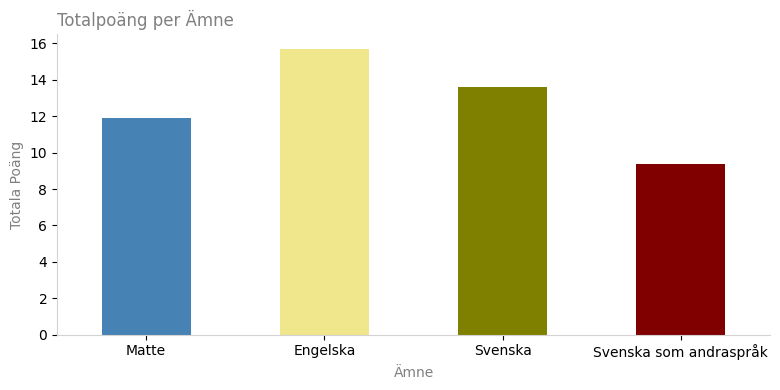

In [6]:
total_scores_per_subject = combined_cleaned.iloc[0] # filtered on index 0 

colors = ['steelblue', 'khaki', 'olive', 'maroon'] # color palette for the bar plot

ax_new = total_scores_per_subject.plot(kind='bar', figsize=(8, 4), color=colors) # create a barplot and define the size and colors

# sets title and labels for x and y axis
plt.title('Totalpoäng per Ämne', loc='left', color= 'grey')
plt.xlabel('Ämne', color= 'grey')
plt.ylabel('Totala Poäng', color= 'grey')

plt.xticks(rotation=0) # rotate the x-axis for better readability

# hides right and top spine for a cleaner look, sets lighter colours on the rest
ax_new.spines['top'].set_visible(False)
ax_new.spines['right'].set_visible(False)
ax_new.spines['bottom'].set_color('lightgray')
ax_new.spines['left'].set_color('lightgray')

plt.tight_layout()
plt.show()

## Total points subplots
- 0.d Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen

- Create a set of bar charts comparing total scores across four subjects for different 'huvudmän'. Making missing data NaN, organizes the data into subjects and 'huvudmän' labels, and generate four subplots in a 2x2 layout.
- Each subplot represent one 'huvudman' and displaying scores for each of the subjects. The charts is customized for better readability and visual appearance.

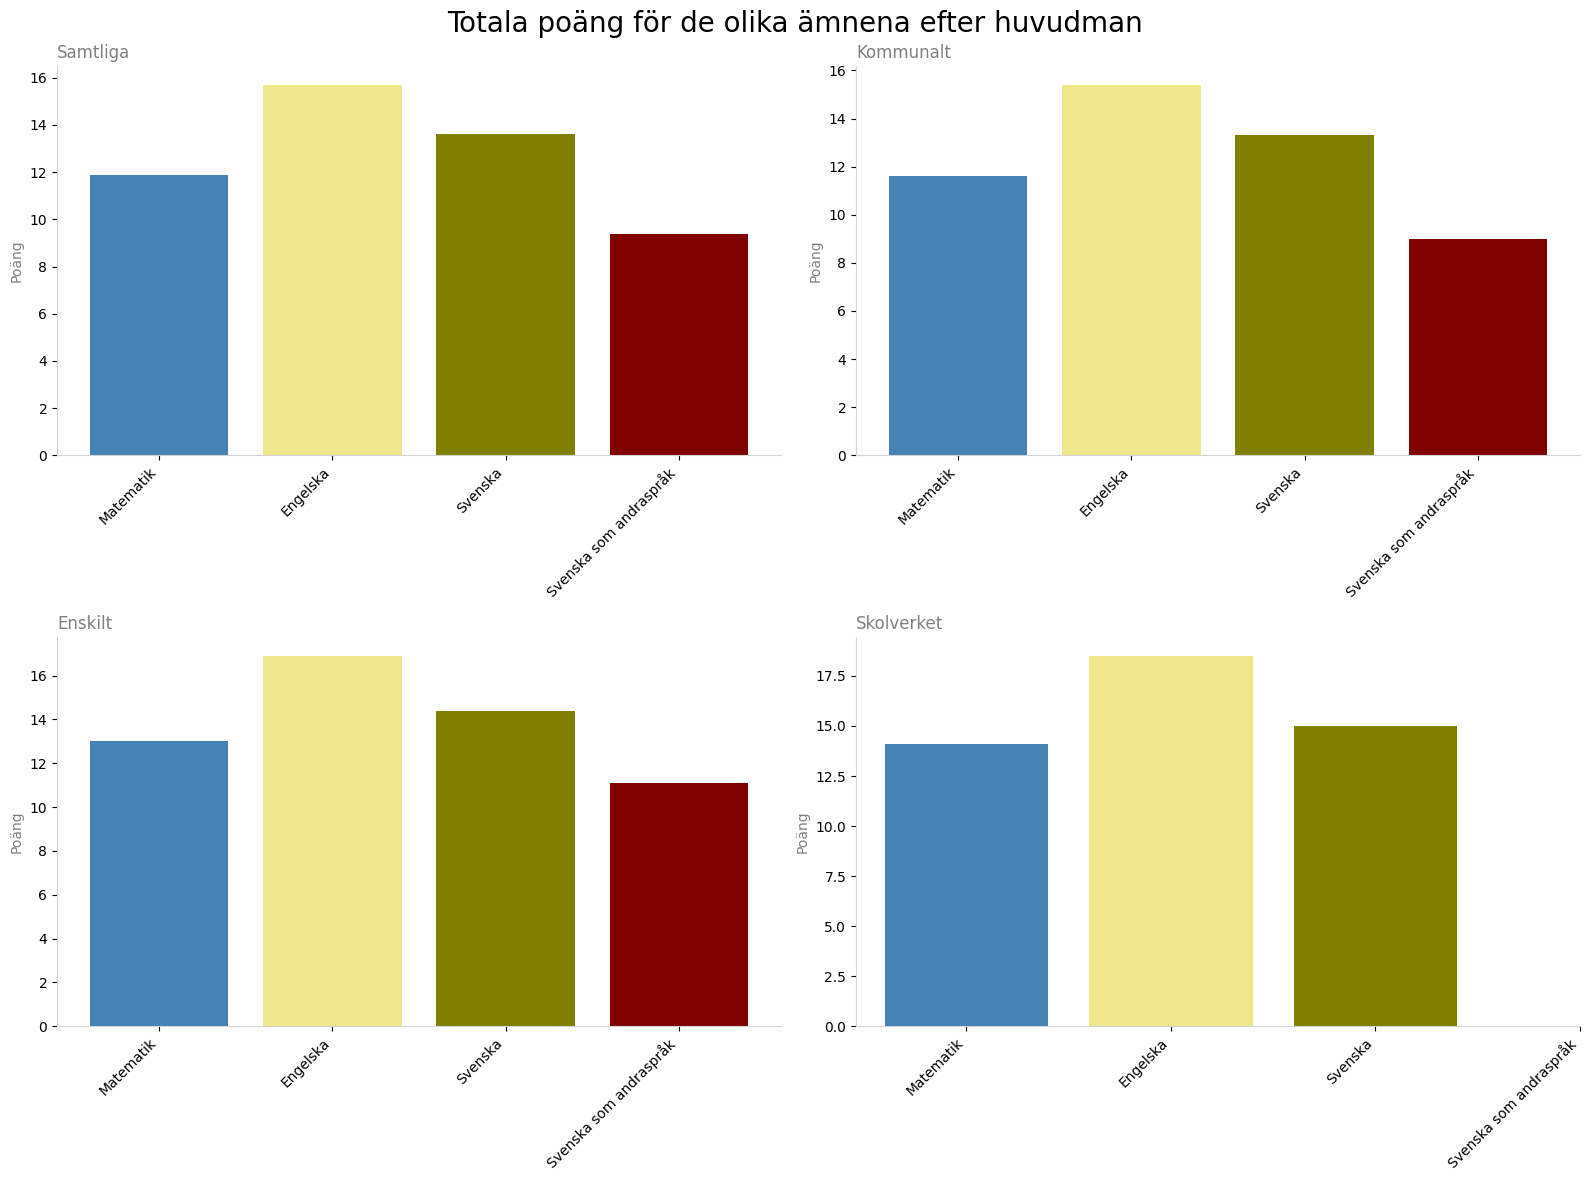

In [7]:
import numpy as np

# Convert other language total scores to float, setting ".." as NaN
cleaned_other_lang_total = [np.nan if x == '..' else float(x) for x in other_lang_total]
# Subjects name
subjects = ['Matematik', 'Engelska', 'Svenska', 'Svenska som andraspråk']
# Huvudmännens name for x-axis
labels = ['Samtliga', 'Kommunalt', 'Enskilt', 'Skolverket']
# Create 4 subplots in a 2x2 layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Flattens ax-array for easier iteration
# converts the multi-dimensional array into a 1D array, making it easier to loop through each subplot // Thanks chatgpt :)
axes = axes.flatten()

# For each huvudman, create a chart with points for each subject
for i, label in enumerate(labels):
    # Gets the scores for each subject for the current huvudmans authority
    totals = [math_total[i], english_total[i], swedish_total[i], cleaned_other_lang_total[i]]
    axes[i].bar(subjects, totals, color=colors)
    axes[i].set_title(label, loc="left", color='grey')
    axes[i].set_xticks(range(len(subjects)))  # Define the positions for the x-ticks
    axes[i].set_xticklabels(subjects, rotation=45, ha="right")  # Rotate 45 degrees for better readability
    axes[i].set_ylabel('Poäng', color='grey')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['bottom'].set_color('lightgray')
    axes[i].spines['left'].set_color('lightgray')

# Sets a supertitle
fig.suptitle('Totala poäng för de olika ämnena efter huvudman', fontsize=20)

plt.tight_layout()
plt.show()

## Uppgift 1 - uppvärmning betyg och prov


- a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

- Read data from 2 sheets. 
- Set column namnes.
- Handle missing values.

In [8]:
file_path_betyg = ("../Labb2/betyg_o_prov_riksnivå.xlsx")


df_betyg_T1a = pd.read_excel(file_path_betyg, sheet_name='Tabell 1A', skiprows=9)
df_betyg_T1b = pd.read_excel(file_path_betyg, sheet_name='Tabell 1B', skiprows=7)

df_betyg_T1a.columns = ['Läsår/huvudman/Bakgrund', 'Elever som avslutat åk 9 (Totalt)', 'Elever som avslutat åk 9 (Flickor)', 'Elever som avslutat åk 9 (Pojkar)', ' Med slutbetyg (Totalt)', 
                        'Med slutbetyg (Flickor)', 'Med slutbetyg (Pojkar)', 'Med godkända slutbetyg (Totalt)', 
                        'Med godkända slutbetyg (Flickor)', 'Med godkända slutbetyg (Pojkar)']

df_betyg_T1a.replace('.', np.nan, inplace=True) # handle missing values

df_betyg_T1b.columns = ['Läsår/huvudman/Bakgrund', 'Genomsnittligt meritvärde Tot (16 ämnen)', 'Genomsnittligt meritvärde F (16 ämnen)', 'Genomsnittligt meritvärde P (16 ämnen)', 'Genomsnittligt meritvärde Tot (17 ämnen)', 
                        'Genomsnittligt meritvärde F (17 ämnen)', 'Genomsnittligt meritvärde P (17 ämnen)', '(%) elever som saknar godkänt betyg i ett eller fler ämnen (Totalt)', 
                        '(%) elever som saknar godkänt betyg i ett eller fler ämnen (Flickor)', '(%) elever som saknar godkänt betyg i ett eller fler ämnen (Pojkar)']

df_betyg_T1b.head()


C:\Users\utjis\AppData\Local\Temp\ipykernel_6424\1887249937.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_betyg_T1a.replace('.', np.nan, inplace=True) # handle missing values


,Läsår/huvudman/Bakgrund,Genomsnittligt meritvärde Tot (16 ämnen),Genomsnittligt meritvärde F (16 ämnen),Genomsnittligt meritvärde P (16 ämnen),Genomsnittligt meritvärde Tot (17 ämnen),Genomsnittligt meritvärde F (17 ämnen),Genomsnittligt meritvärde P (17 ämnen),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Totalt),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Flickor),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Pojkar)
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


## Plot task 1 

- Extracts data from the first 5 rows and selected columns of the Dataframe ('df_betyg_T1B'). Rename columns for clarity, create a line chart using plotly to show the trend
- of students without passing grades over different school years. The chart is customized in diffrents ways for better readability. Saves the chart as an html file. 

In [9]:
import plotly.express as px

# Select relevant data: first 5 rows, columns for year and percentages
df_focused_failed = df_betyg_T1b.iloc[:5, [0, 7, 8, 9]].copy()

# Rename columns for clarity in the plot
df_focused_failed.columns = ['Läsår', 'Totalt (%)', 'Flickor (%)', 'Pojkar (%)']

# Create the linechart with Plotly with the new data
fig = px.line(df_focused_failed, x='Läsår', y=['Totalt (%)', 'Flickor (%)', 'Pojkar (%)'], 
              title="Andel elever som saknar godkänt betyg i ett eller fler ämnen 2018-2023",
              labels={"value": "Andel (%)", "variable": "Grupp"},
              markers=True, # Add markers for each data point
              color_discrete_map={ # Assign custom colors
                  'Totalt (%)': 'orangered',  
                  'Flickor (%)': 'indigo',  
                  'Pojkar (%)': 'teal'  
              })

# Update the layout of the figure for a cleaner presentation
fig.update_layout(yaxis_tickformat = '.1f', # Formats the y-axis ticks to show numbers with one decimal 
                  xaxis_title="Läsår", 
                  yaxis_title="Andel (%) som saknar godkänt betyg", 
                  legend=dict(title="Grupper",orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1), # Customizes the legend's appearance and position
                  paper_bgcolor="white", plot_bgcolor="whitesmoke",
                  xaxis=dict(title_font=dict(size=14, color='DarkBlue'), # Adjusts the font size and color of the x-axis title
                  tickfont=dict(size=12, color='DarkGreen'), # Adjusts the font size and color of the x-axis tick labels
                  ),yaxis=dict(
                  title_font=dict(size=14, color='DarkBlue'),
                  tickfont=dict(size=12, color='DarkGreen'),
                  tickformat='.1f', # Ensures that tick labels on the y-axis have one decimal place
    )
)


fig.write_html("../Labb2/Visualiseringar/Uppgift_1_a_Andel_elever_saknar_betyg.html") #Save the chart as a html file.

fig.show()


## b.)

- Mostly the same as the plot above except this chart visualize the average merit scores for 16 subjects from 2018 to 2023, separated by total, girls, and boys.

In [26]:
df_focused_merit = df_betyg_T1b.iloc[:5, [0, 1, 2, 3]].copy()

df_focused_merit.columns = ['Läsår', 'Totalt', 'Flickor', 'Pojkar']

fig = px.line(df_focused_merit, x='Läsår', y=['Totalt', 'Flickor', 'Pojkar'], 
              title="Meritvärde för 16 ämnen 2018-2023",
              labels={"value": "Antal", "variable": "Grupp"},
              markers=True, 
              color_discrete_map={ 
                  'Totalt': 'tomato',  
                  'Flickor': 'darkviolet',  
                  'Pojkar': 'cadetblue'  
              })
fig.update_layout(yaxis_tickformat = '.1f', 
                  xaxis_title="Läsår", 
                  yaxis_title="Meritvärde", 
                  legend=dict(title="Grupper",orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1), 
                  paper_bgcolor="white", plot_bgcolor="whitesmoke")
fig.write_html("../Labb2/Visualiseringar/Uppgift_1_b_Meritvärde_16_ämnen.html")
fig.show()

## C.)

- C.) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

In [11]:
df_betyg_T1b

,Läsår/huvudman/Bakgrund,Genomsnittligt meritvärde Tot (16 ämnen),Genomsnittligt meritvärde F (16 ämnen),Genomsnittligt meritvärde P (16 ämnen),Genomsnittligt meritvärde Tot (17 ämnen),Genomsnittligt meritvärde F (17 ämnen),Genomsnittligt meritvärde P (17 ämnen),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Totalt),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Flickor),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Pojkar)
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0
5,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
7,Enskild,237.9,245.0,230.8,247.2,254.8,239.7,18.7,18.4,19.0
8,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18.0,17.7,18.3


In [12]:

df_filtered_parents = df_betyg_T1b.loc[[22, 23, 24]] # Filtering out the needed information for the coming charts from the ('df_betyg_T1b') Dataframe.

df_filtered_parents

,Läsår/huvudman/Bakgrund,Genomsnittligt meritvärde Tot (16 ämnen),Genomsnittligt meritvärde F (16 ämnen),Genomsnittligt meritvärde P (16 ämnen),Genomsnittligt meritvärde Tot (17 ämnen),Genomsnittligt meritvärde F (17 ämnen),Genomsnittligt meritvärde P (17 ämnen),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Totalt),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Flickor),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Pojkar)
22,Förgymnasial utbildning,163.8,172.2,155.8,166.8,175.6,158.3,63.5,61.5,65.3
23,Gymnasial utbildning,197.4,207.2,188.2,203.2,213.6,193.3,37.4,35.2,39.5
24,Eftergymnasial utbildning,239.1,247.9,230.7,248.6,258.1,239.6,16.8,16.1,17.5


### C.) Plot

- This code generates two bar charts using Plotly, showing the relationship between parental education levels and student academic outcomes. 
- The first chart visualizes average merit scores across 17 subjects, while the second displays the percentage of students lacking passing grades, both categorized by parental education level.
- The charts are customized for better readability

In [27]:
# Create a bar plot for the average merit scores of students based on parental education level
fig_merit = px.bar(df_filtered_parents, x='Läsår/huvudman/Bakgrund',
                   y='Genomsnittligt meritvärde Tot (17 ämnen)',
                   title='Genomsnittliga Meritvärden i Relation till Föräldrarnas Utbildningsnivå',
                   labels={'Genomsnittligt meritvärde Tot (17 ämnen)': 'Genomsnittligt Meritvärde (17 Ämnen)'},
                   color='Läsår/huvudman/Bakgrund',  # Color code bars based on the category of parental education
                   color_discrete_map={  
                       'Förgymnasial utbildning': 'orangered', # Map colors to specific education levels
                       'Gymnasial utbildning': 'indigo',
                       'Eftergymnasial utbildning': 'teal'
                   })
fig_merit.update_layout(width=800, height=500, title_x= 0.5, xaxis_title = 'Föräldrarnas utbildningsnivå', showlegend=False) # Update layout settings for a better presentation
fig_merit.write_html("../Labb2/Visualiseringar/Uppgift_1_c_parents_merit_value.html")

fig_merit.show()


# Create a second bar plot showing the percentage of students lacking passing grades based on parental education level
fig_andel = px.bar(df_filtered_parents, x='Läsår/huvudman/Bakgrund',
                   y='(%) elever som saknar godkänt betyg i ett eller fler ämnen (Totalt)',
                   title='Andelen Elever Utan Godkända Betyg i Förhållande till Föräldrarnas Utbildningsnivå',
                   labels={'(%) elever som saknar godkänt betyg i ett eller fler ämnen (Totalt)': 'Andel Elever Utan Godkända Betyg (%)'},
                   color='Läsår/huvudman/Bakgrund', 
                   color_discrete_map={ 
                       'Förgymnasial utbildning': 'orangered',
                       'Gymnasial utbildning': 'indigo',
                       'Eftergymnasial utbildning': 'teal'
                   })
fig_andel.update_layout(width=800, height=500, title_x= 0.5, xaxis_title = 'Föräldrarnas utbildningsnivå', showlegend=False)
fig_andel.write_html("../Labb2/Visualiseringar/Uppgift_1_c_Better_education_higher_merit.html")
fig_andel.show()

## Combine the charts to one window

- Chat gpt helped me here because my html skills arent that good. 
- combined both charts into the same window to make the compare easier. 

In [14]:
html_template = """
<html>
<head>
<title>Plotly Charts</title>
</head>
<body>
    <h1>Visualizations</h1>
    <div style="display:flex;">
        <div style="width: 50%;">{fig_merit}</div>
        <div style="width: 50%;">{fig_andel}</div>
    </div>
</body>
</html>
"""

# Export each figure to a div using Plotly's to_html method with full_html=False
fig_merit_div = fig_merit.to_html(full_html=False, include_plotlyjs='cdn')
fig_andel_div = fig_andel.to_html(full_html=False, include_plotlyjs='cdn')

# Insert each figure's div into the HTML template
final_html = html_template.format(fig_merit=fig_merit_div, fig_andel=fig_andel_div)

# Save the combined HTML to a file
with open("../Labb2/Visualiseringar/Uppgift_1_c_Combined_Visualizations_parents.html", "w") as file:
    file.write(final_html)

## Uppgift 2 - KPIer & EDA

- Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. 
- Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker 
- med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript,
- skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar

### KPI 1 Gymnasieskola - Relationen mellan kursbetyg och kursprovsbetyg

- In this analysis, we explore the relationship between course grades and exam grades for English 5 among high school students during the fall semester of 2022. The purpose is to identify and 
- understand any discrepancies between these grades across different types of school authorities – municipal and private schools. 
- By examining these discrepancies, The goal aim is to provide insights that may be relevant for students and their parents regarding school choice. 

In [15]:
file_path_Relations = ("../Labb2/Gymnasieskola - Relationen mellan kursbetyg och kursprovsbetyg HT22 Riket.xlsx")

relations_grade_test_english_5 = pd.read_excel(file_path_Relations, sheet_name='Engelska 5', skiprows=8)

relations_grade_test_english_5

,Riket,Typ av huvudman,Antal elever,Andel lägre,Andel lika,Andel högre,Antal kvinnor,Andel lägre kvinnor,Andel lika kvinnor,Andel högre kvinnor,Antal män,Andel lägre män,Andel lika män,Andel högre män
0,Riket,Samtliga,177,7.3,79.7,13.0,70,5.7,74.3,20.0,107,8.4,83.2,8.4
1,Riket,Kommunal,114,1.8,86.8,11.4,46,2.2,80.4,17.4,68,1.5,91.2,7.4
2,Riket,Enskild,63,17.5,66.7,15.9,24,12.5,62.5,25.0,39,20.5,69.2,10.3


## Data KPI 1

- The data is taken from skolverkets statistik. which contains information about course grades and exam grades for engelska 5 among high school students fall 2022.
- The dataset includes variables such as: 
- Riket: states that the data is national
- Typ av huvudman: categorise schools as either municipal or private.
- Antal elever med både prov och kursbetyg: Total amount of students with both exam and course grades.
- Andel med lägre/högre/likadant kursbetyg som provbetyg: Percentage of students whose course grades are lower, higher, or equal to their exam grades
- Antal kvinnor/män med både prov och kursbetyg: Division of students based on gender.
- Andel kvinnor/män med lägre/högre/likadant kursbetyg som provbetyg: Percentage divided by gender.

In [16]:
relations_grade_test_english_5.columns = ['Riket', 
                                            'Typ av huvudman', 
                                            'Antal elever med både prov och kursbetyg', 
                                            'Lägre kursbetyg än provbetyg',
                                            'Andel med likadant kurs som provbetyg',
                                            'Högre kursbetyg än provbetyg',
                                            'Antal kvinnor med både prov och kursbetyg',
                                            'Andel kvinnor med lägre kursbetyg än provbetyg',
                                            'Andel kvinnor mer likadant kurs som provbetyg',
                                            'Andel kvinnor med högre kursbetyg än provbetyg', 
                                            'Antal män med både prov och kursbetyg', 
                                            'Andel män mer likadant kurs som provbetyg',
                                            'Andel män med lägre kursbetyg än provbetyg', 
                                            'Andel män med högre kursbetyg än provbetyg']

relations_grade_test_english_5

,Riket,Typ av huvudman,Antal elever med både prov och kursbetyg,Lägre kursbetyg än provbetyg,Andel med likadant kurs som provbetyg,Högre kursbetyg än provbetyg,Antal kvinnor med både prov och kursbetyg,Andel kvinnor med lägre kursbetyg än provbetyg,Andel kvinnor mer likadant kurs som provbetyg,Andel kvinnor med högre kursbetyg än provbetyg,Antal män med både prov och kursbetyg,Andel män mer likadant kurs som provbetyg,Andel män med lägre kursbetyg än provbetyg,Andel män med högre kursbetyg än provbetyg
0,Riket,Samtliga,177,7.3,79.7,13.0,70,5.7,74.3,20.0,107,8.4,83.2,8.4
1,Riket,Kommunal,114,1.8,86.8,11.4,46,2.2,80.4,17.4,68,1.5,91.2,7.4
2,Riket,Enskild,63,17.5,66.7,15.9,24,12.5,62.5,25.0,39,20.5,69.2,10.3


## Preparing data

- Relevant variables were isolated for analysis, primarily examining discrepancies between course and exam grades.
- focusing on understanding the difference between course grades and exam grades for students. To do this, grouped the data by 'Typ av huvudman' (type of school authority) to compare municipal and private schools.
- calculating the mean percentages of students whose course grades were higher or lower than their exam grades.

In [17]:
average_deviation = relations_grade_test_english_5.groupby('Typ av huvudman')[['Lägre kursbetyg än provbetyg', 'Högre kursbetyg än provbetyg']].mean()
average_deviation

,Lägre kursbetyg än provbetyg,Högre kursbetyg än provbetyg
Typ av huvudman,,
Enskild,17.5,15.9
Kommunal,1.8,11.4
Samtliga,7.3,13.0


## Results

- Comparing School Types:
    - Municipal Schools: This shows us how students in municipal schools performed. A higher precentage of student got higher course grade than exam grade.
    - Private Schools: Students in private schools showed a different pattern. This indicates differences between school types. With an almost equal precentage.

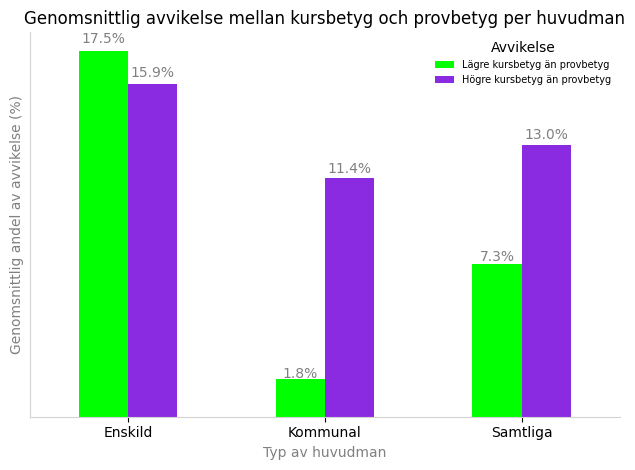

In [18]:
colors_dev = ['lime', 'blueviolet']

ax = average_deviation.plot(kind='bar', y=['Lägre kursbetyg än provbetyg', 'Högre kursbetyg än provbetyg'], color= colors_dev)

plt.title('Genomsnittlig avvikelse mellan kursbetyg och provbetyg per huvudman', fontsize = 12)
plt.xlabel('Typ av huvudman', color= 'grey')
plt.ylabel('Genomsnittlig andel av avvikelse (%)', color= 'grey')
plt.xticks(rotation=0)  
plt.legend(title='Avvikelse', frameon=False, fontsize = 7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')

plt.yticks([]) # removes yticks

for p in ax.patches:
    
    # Get the width and height of the bar.
    width, height = p.get_width(), p.get_height()
    
    # Get the bottom left coordinates (x, y) of the bar.
    x, y = p.get_xy() 
    
    # Adds a label on top of each bar.
    # The label text is the height value formatted to one decimal place followed by '%'.
    # Place the label at the center of the top of the bar (x + width/2, y + height*1.02).
    # ha='center' aligns the text to the center of the bar
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height*1.02), color= 'grey', ha='center')


plt.tight_layout()  
plt.show()

## Conclusions

- Municipal Schools: Students often get higher course grades. This might mean easier grading or better class preparation.
- Private Schools: Grades are more even, showing that coursework and exams match up closely.
-------------------------------------------------------------------------------------------------------------------------

## Task 2 Avarage grade point KPI 

- The idea of this analysis was to explore the trends in avarage grade points across 'Högskoleförberedande program' and 'yrkesprogram' in Kungälv kommun.
- Average grade points serve as a KPI that reflects the overall academic performance of students within these programs. 
- With this analysis the aim is to find the program with lower avarage grade. And in later stages find ways to strengthen the grades of the lower program.

## Preparing and cleaning data 

- Defining file path and target 'Kungälvs kommun' for analysis
- Loop through a list of programs and filtering data to only include entries for 'Kungälvs kommun'.
- Resetting index and cleaning the data.

In [19]:
file_path_compare_grade = "../Labb2/Gymnasieskola - Jämförelse av betygsresultat över tid 2023 Huvudman.xlsx"
huvudman_target = 'Kungälvs kommun'

# List of sheet names
sheets = [
    'Nationella program',
    'Högskoleförberedande program',
    'Yrkesprogram',
    'Bygg- och anläggningsprogramme',
    'Ekonomiprogrammet',
    'El- och energiprogrammet'
]

# read and filter data for each sheet
df_dict = {}
# Loop through each sheet specified in the 'sheets' list
for sheet in sheets:
    df = pd.read_excel(file_path_compare_grade, sheet_name=sheet, skiprows=7) # Read the data from the specified sheet in the Excel file, skipping the first 7 rows
    df_filtered = df.loc[df['Huvudman'] == huvudman_target] # Filter DataFrame to only include lines when 'Huvudman' is 'Kungälvs kommun'
    df_dict[sheet] = df_filtered.reset_index(drop=True) # Add the filtered DataFrame to the dictionary, resetting the index 

# Clean the data 
for sheet, df in df_dict.items():
    df_dict[sheet] = df.replace(['..', '.'], np.nan)




C:\Users\utjis\AppData\Local\Temp\ipykernel_6424\3198659261.py:24: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [20]:
df_dict['Högskoleförberedande program']

,Huvudman,Huvudman orgnr,Typ av huvudman,Uppgift,2022/23,2021/22,2020/21,2019/20,2018/19,2017/18,2016/17,2015/16,2014/15,2013/14
0,Kungälvs kommun,2120001371,Kommunal,Antal elever med gymnasieexamen,266.0,219.0,223.0,216.0,183.0,195.0,198.0,186.0,212.0,228.0
1,Kungälvs kommun,2120001371,Kommunal,- varav andel (%) kvinnor,50.4,51.1,55.2,43.5,47.0,53.3,57.1,51.1,53.8,53.9
2,Kungälvs kommun,2120001371,Kommunal,- varav andel (%) med utl. bakgrund,13.5,13.2,9.9,11.6,12.6,11.3,13.1,7.0,11.3,12.7
3,Kungälvs kommun,2120001371,Kommunal,Genomsnittlig betygspoäng,14.5,14.4,14.4,13.9,14.1,13.7,14.2,13.7,13.5,14.3
4,Kungälvs kommun,2120001371,Kommunal,Andel (%) elever behöriga till högskola,89.0,91.3,89.2,84.0,87.1,84.8,86.1,82.3,84.8,87.4


In [21]:
df_dict['Yrkesprogram']

,Huvudman,Huvudman orgnr,Typ av huvudman,Uppgift,2022/23,2021/22,2020/21,2019/20,2018/19,2017/18,2016/17,2015/16,2014/15,2013/14
0,Kungälvs kommun,2120001371,Kommunal,Antal elever med gymnasieexamen,128.0,111.0,109.0,107.0,134.0,117.0,124.0,128.0,151.0,122.0
1,Kungälvs kommun,2120001371,Kommunal,- varav andel (%) kvinnor,34.4,25.2,34.9,34.6,28.4,35.0,41.9,35.9,39.1,32.0
2,Kungälvs kommun,2120001371,Kommunal,- varav andel (%) med utl. bakgrund,9.4,9.0,14.7,9.3,11.2,8.5,11.3,10.2,10.6,NaN
3,Kungälvs kommun,2120001371,Kommunal,Genomsnittlig betygspoäng,12.7,12.9,12.9,12.9,12.7,12.9,12.6,12.7,12.0,11.8
4,Kungälvs kommun,2120001371,Kommunal,Andel (%) elever behöriga till högskola,23.2,14.2,28.0,26.0,22.7,26.3,39.9,35.1,31.8,31.0


## Results 

- The trend shows a consistent diffrence in avarage grade points between 'Högskoleförberedande program' and 'Yrkesprogram'. With 'Högskoleförberedande program' as higher avarage grade.
- This gap can be a result of for example student engagement, teacher resourses and so on.




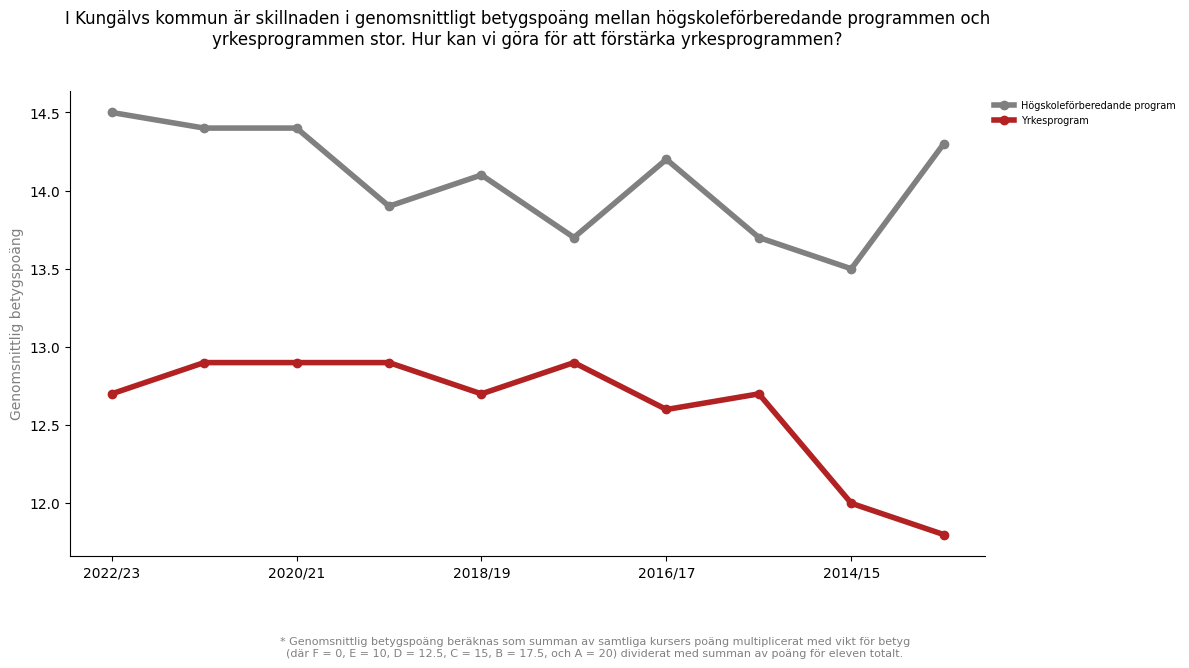

In [22]:
programs_to_compare = ['Högskoleförberedande program', 'Yrkesprogram']
colors_compare = ['grey', 'firebrick']

plt.figure(figsize=(12, 6))

#  Loop through the selected programs
for i, program in enumerate(programs_to_compare):
    # Select the program's DataFrame from the dictionary
    df_program = df_dict[program]
    # Find the row with average grade points
    betygspoäng = df_program[df_program['Uppgift'].str.contains('Genomsnittlig betygspoäng')] 
    # Extract the years and their corresponding values
    years = betygspoäng.columns[4:].tolist() 
    values = betygspoäng.iloc[0, 4:].values
    #plot the lines with choosen colors and linewidth
    plt.plot(years, values, marker='o', label=program, color=colors_compare[i], linewidth = 4)  

plt.title('I Kungälvs kommun är skillnaden i genomsnittligt betygspoäng mellan högskoleförberedande programmen och yrkesprogrammen stor. Hur kan vi göra för att förstärka yrkesprogrammen?\n\n', wrap=True)
plt.xlabel('')
plt.ylabel('Genomsnittlig betygspoäng', color='grey')
plt.legend(frameon=False, fontsize=7, loc='upper left', bbox_to_anchor=(1, 1)) # Placing the legend outside the plot area
plt.xticks(years[::2], rotation=0) # Only display every other year on the x-axis


ax = plt.gca()  # Accessing the current axes to modify spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Adding a footnote explaining how the average grade points are calculated
grade_explanation = "* Genomsnittlig betygspoäng beräknas som summan av samtliga kursers poäng multiplicerat med vikt för betyg\n(där F = 0, E = 10, D = 12.5, C = 15, B = 17.5, och A = 20) dividerat med summan av poäng för eleven totalt."
plt.figtext(0.5, -0.1, grade_explanation, wrap=True, horizontalalignment='center', fontsize=8, color='grey')

plt.show()

## Conclusion

- There is a clear academic performance gap between the 'Högskoleförberedande' and 'Yrkesprogram' in Kungälv kommun, as evidenced by the average grade points. This disparity highlights the need for targeted interventions to enhance the educational outcomes of the 'Yrkesprogram'.
--------------------

## KPI 3

- This KPI is designed to evaluate the eligibility of students from six specific programs to pursue higher education at the university level. 
- It quantifies the percentage of students from each program who meet the qualifications necessary to continue their studies at a 'högskola' (university or college).

In [23]:
df_dict['Ekonomiprogrammet']

,Huvudman,Huvudman orgnr,Typ av huvudman,Uppgift,2022/23,2021/22,2020/21,2019/20,2018/19,2017/18,2016/17,2015/16,2014/15,2013/14
0,Kungälvs kommun,2120001371,Kommunal,Antal elever med gymnasieexamen,100.0,72.0,49.0,75.0,48.0,67.0,54.0,47.0,23.0,39.0
1,Kungälvs kommun,2120001371,Kommunal,- varav andel (%) kvinnor,51.0,58.3,46.9,57.3,45.8,40.3,63.0,44.7,56.5,51.3
2,Kungälvs kommun,2120001371,Kommunal,- varav andel (%) med utl. bakgrund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kungälvs kommun,2120001371,Kommunal,Genomsnittlig betygspoäng,14.1,14.1,14.4,14.4,13.7,13.1,14.3,13.9,13.9,13.9
4,Kungälvs kommun,2120001371,Kommunal,Andel (%) elever behöriga till högskola,87.7,90.0,90.7,90.4,88.9,77.0,88.5,83.9,95.8,83.0


## Preparing data

- Using a function to calculate the avarage eligibility on all the programs in 'Kungälvs Kommun' from 2013-2023


In [24]:
# Function to calculate the average eligibility to pursue a higher education level.
def calculate_average_eligibility(df_dict):
    average_eligibility = {}
    for sheet, df in df_dict.items():                                                               # Iterate over each sheet (program) and its corresponding DataFrame in the dictionary
        if 'Andel (%) elever behöriga till högskola' in df['Uppgift'].values:                       # Check if the DataFrame contains the specific row for eligibility for higher education.
            eligibility_data = df[df['Uppgift'] == 'Andel (%) elever behöriga till högskola']       # Extract the rows where the 'Uppgift' column matches the eligibility criterion..
            year_columns = [col for col in df.columns if col.startswith('20')]                      # List all columns that represent years (starting with '20').
            avarage = eligibility_data[year_columns].mean(axis=1).values[0]                         # calculate avarage for columns
            average_eligibility[sheet] = avarage
    return average_eligibility

average_eligibility = calculate_average_eligibility(df_dict)
average_eligibility

{'Nationella program': 64.96999999999998,
 'Högskoleförberedande program': 86.6,
 'Yrkesprogram': 27.820000000000004,
 'Bygg- och anläggningsprogramme': 54.25,
 'Ekonomiprogrammet': 87.59,
 'El- och energiprogrammet': 43.2}

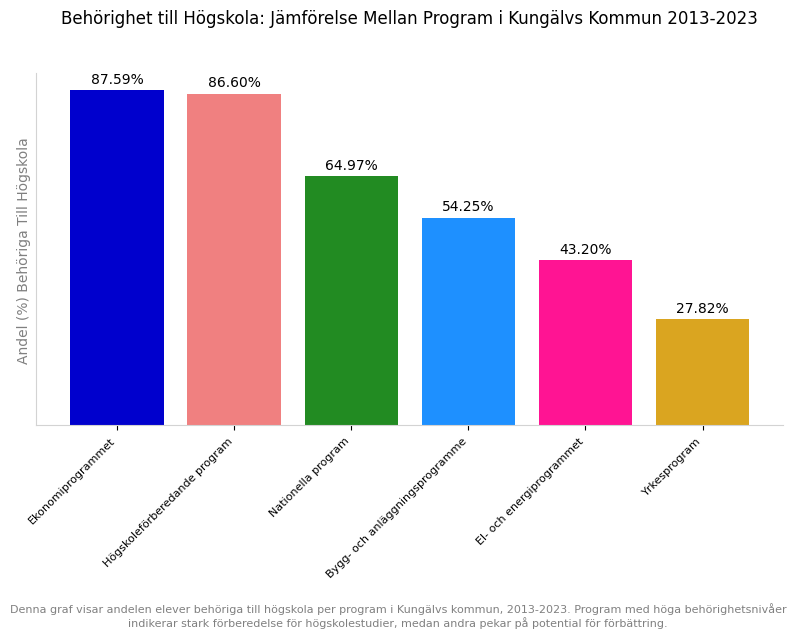

In [25]:
# Convert the average_eligibility dictionary to a DataFrame
df = pd.DataFrame(list(average_eligibility.items()), columns=['Program', 'Behörighet'])

# Sort DataFrame based on 'Behörighet' in descending order
df_sorted = df.sort_values(by='Behörighet', ascending=False)

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['mediumblue', 'lightcoral', 'forestgreen', 'dodgerblue', 'deeppink', 'goldenrod']  
bars = ax.bar(df_sorted['Program'], df_sorted['Behörighet'], color=colors)

ax.set_title('Behörighet till Högskola: Jämförelse Mellan Program i Kungälvs Kommun 2013-2023\n\n') 
ax.set_ylabel('Andel (%) Behöriga Till Högskola', color='grey') 
ax.set_yticks([])  # Hide y-ticks because the percentage is shown on the bars
plt.xticks(rotation=45, ha="right", fontsize=8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('lightgray')
ax.spines['left'].set_color('lightgray')

# adds the percentage on the bars
for bar in bars:
    height = bar.get_height()                                   # get the height
    label = "{:.2f}%".format(height)                            # Format the height as a string with 2 decimal places and a % sign
    ax.annotate(label,
                xy=(bar.get_x() + bar.get_width() / 2, height), # position the text in the middle above the bar
                xytext=(0, 3),                                  # small adjustment upwards from the top of the bar
                textcoords="offset points",                     # use offset from xy-position
                ha='center',                                    # Center text horizontally
                va='bottom')                                    # adjust text down from its position

plt.tight_layout() 

# Add a descriptive subtitle below the chart
plt.figtext(0.5, -0.05, "Denna graf visar andelen elever behöriga till högskola per program i Kungälvs kommun, 2013-2023. Program med höga behörighetsnivåer indikerar stark förberedelse för högskolestudier, medan andra pekar på potential för förbättring.", ha="center", wrap=True, fontsize=8, color="grey")

plt.show()

## Conclusion

- This analysis shows that its a clear disparity in higher education prepardness among students from the different programs. While some programs excels in preparing students for further studies, others need alot of improvement. 
-------- 

### Summary Labb 2

- I wouldn't say that Lab 2 was easier than Lab 1—it definitely wasn't. There's a lot to learn, and I've spent a considerable amount of time scratching my head, wondering what I've gotten myself into. But, in the end, it seems to have worked out pretty well. 

- The journey through Lab 2 has been both challenging and rewarding. It has been interesting and enjoyable to delve into Python and AI, and I'm eager to learn more. While I recognize that there's much more I could do to enhance the storytelling aspect of my graphs, I think they are reasonably satisfactory as they stand.

- There have been hurdles along the way, but thanks to the support from various quarters—including Google, ChatGPT, my classmates, and Kokchun—I've managed to navigate through them. This collaborative and resourceful approach to problem-solving has been invaluable, and it's something I look forward to leveraging as I continue my learning journey.

- Overall, despite the difficulties, Lab 2 has been a fulfilling experience, marking another step forward in my exploration of Python and AI.